In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as pyplot

# print(scipy.stats.norm.__doc__)
# print(matplotlib.pyplot.hist.__doc__)






1. For a mean μ = 163 and and a standard deviation of σ = 10, generate 10000 samples from the Normal distribution. You are given that this is a distribution over height h.

In [6]:
mean = 163
standard_deviation = 10
sample_size = 10_000

sample = norm.rvs(loc=mean, scale=standard_deviation, size=sample_size)
height_sample = sample
# print(len(list(sample)))


2. Plot the histogram of the samples with appropriate axes labels. You should think about the following queries:
• What should be the label for the horizontal axis?
• What should be the label for the vertical axis?

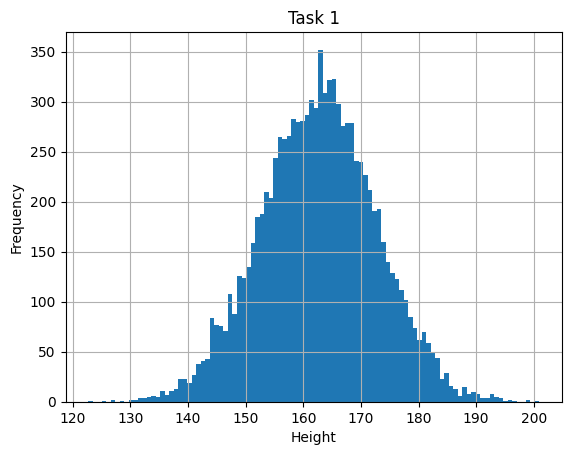

In [9]:
import numpy

counts, bins = numpy.histogram(sample, bins = 100)
# print(counts)
# print(bins)

pyplot.title('Task 1')
pyplot.xlabel('Height')
pyplot.ylabel('Frequency')
pyplot.hist(bins[:-1], bins, weights=counts)
pyplot.grid(True)
pyplot.show()


3. Now, code a Python function for the equation (1) that accepts three parameters: x, μ and σ.
Using the following array x = numpy.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000), evaluate your function, and plot the response. You should think about the following queries:
• What should be the label for the horizontal axis?
• What should be the label for the vertical axis?
• What does this plot represent?

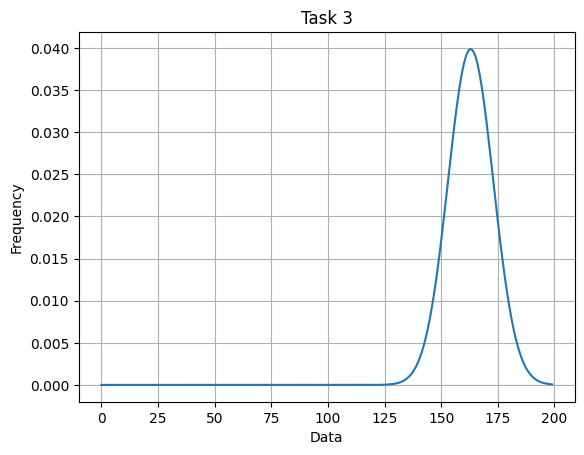

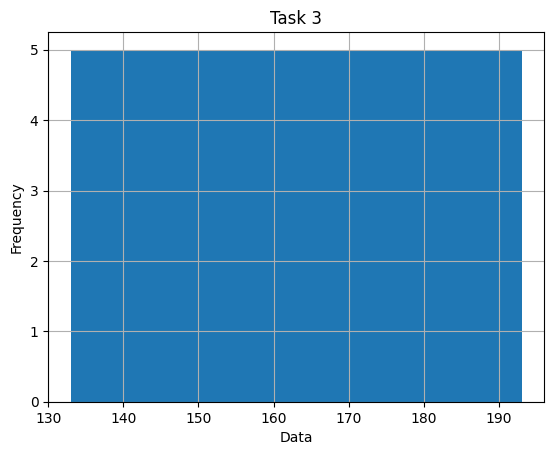

In [10]:
import math
import numpy

# mu - mean, sigma - standard_deviation
def p_of_x(x, mu, sigma):
    return 1 / (sigma * math.sqrt(2 * math.pi)) * math.exp(-0.5 * ((x - mu) / sigma) ** 2)

sample_a_data = numpy.array([])
sample_a_probability = numpy.array([])
for i in range(200):
    px = p_of_x(i, mean, standard_deviation) 
    sample_a_data = numpy.append(sample_a_data, i) 
    sample_a_probability = numpy.append(sample_a_probability, px)
    
pyplot.title('Task 3')
pyplot.xlabel('Data')
pyplot.ylabel('Frequency')
pyplot.plot(sample_a_data, sample_a_probability)
pyplot.grid(True)
pyplot.show()
    
sample_b = numpy.linspace(mean - 3 * standard_deviation, mean + 3 * standard_deviation, 1000)

counts, bins = numpy.histogram(sample_b, bins = 200)
pyplot.title('Task 3')
pyplot.xlabel('Data')
pyplot.ylabel('Frequency')
pyplot.hist(bins[:-1], bins, weights=counts)
pyplot.grid(True)
pyplot.show()


4. For a mean μ = 100 and and a standard deviation of σ = 15, generate 10000 samples from the Normal distribution like before, and plot the relevant histogram with appropriate labels. You are given that this is a distribution over intelligence quotient (IQ) q.

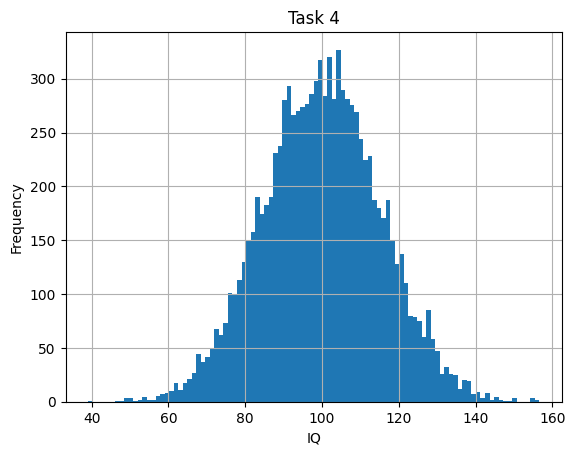

In [11]:
mean = 100
standard_deviation = 15
sample_size = 10_000

sample = norm.rvs(loc=mean, scale=standard_deviation, size=sample_size)
iq_sample = sample
counts, bins = numpy.histogram(sample, bins = 100)
# print(counts)
# print(bins)

pyplot.title('Task 4')
pyplot.xlabel('IQ')
pyplot.ylabel('Frequency')
pyplot.hist(bins[:-1], bins, weights=counts)
pyplot.grid(True)
pyplot.show()


5. Generate a scatter plot (see matplotlib.pyplot.scatter. doc for more information) from he samples where the horizontal axis is the height h and the vertical axis is the intelligence quotient q.

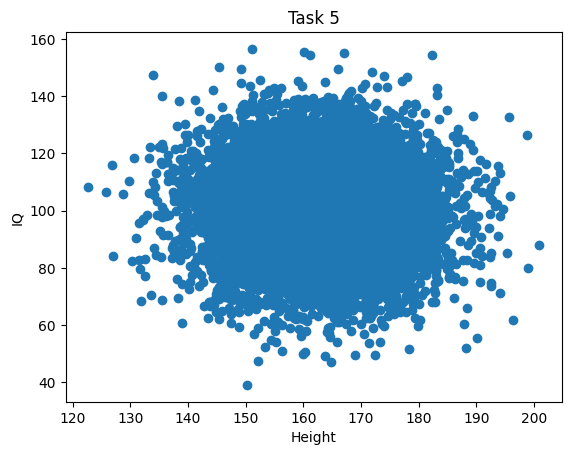

In [12]:
pyplot.title('Task 5')
pyplot.xlabel('Height')
pyplot.ylabel('IQ')
pyplot.scatter(height_sample, iq_sample)
pyplot.show()

6. Study this discussion about the truncated Normal distribution. Based on your analyses, and what you have done thus far, perform the following tasks:
    
    (a) Now, generate a set of 1000 two-dimensional random vectors with the following specifications:
    Mean vector: μ = (163, 100)
    Standard deviation vector: σ = (10, 15)
    Lower bound: l = (140, 80)
    Upper bound: u = (180, 150)

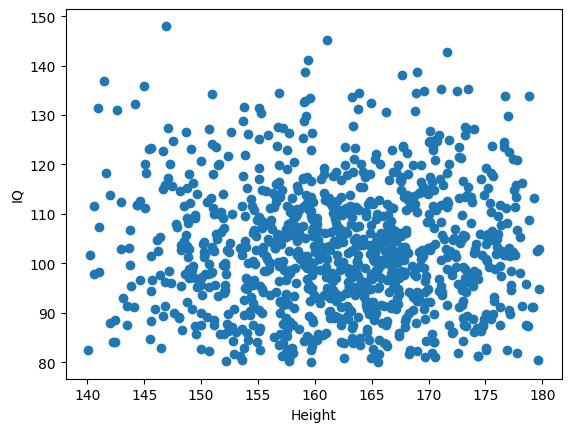

In [22]:
from scipy.stats import truncnorm

sample_size = 1_000
means = [163, 100]
standard_deviations = [10, 15]
lower_bounds = [140, 80]
upper_bounds = [180, 150]

xa = (lower_bounds[0] - means[0]) / standard_deviations[0]
xb = (upper_bounds[0] - means[0]) / standard_deviations[0]

ya = (lower_bounds[1] - means[1]) / standard_deviations[1]
yb = (upper_bounds[1] - means[1]) / standard_deviations[1]


# def generate_random_variables(lower_bound, upper_bound, mean, standard_deviation, sample_size):
#     x_a = (lower_bound - mean) / standard_deviation
#     x_b = (upper_bound - mean) / standard_deviation
#     x_range = numpy.linspace(0, 200, sample_size)
#     y_range = truncnorm.pdf(x_range, x_a, x_b, loc = mean, scale = standard_deviation)
#     return x_range, y_range
# x, y = generate_random_variables(lower_bounds[0], upper_bounds[0], means[0], standard_deviations[0], sample_size)
# pyplot.plot(x, y)
# pyplot.show()

# x, y = generate_random_variables(lower_bounds[1], upper_bounds[1], means[1], standard_deviations[1], sample_size)
# pyplot.plot(x, y)
# pyplot.show()

two_dimensional = truncnorm.rvs(a = [xa, ya], b = [xb, yb], loc = means, scale = standard_deviations, size = (sample_size, 2))
x, y = numpy.hsplit(two_dimensional, 2)
pyplot.xlabel('Height')
pyplot.ylabel('IQ')
pyplot.scatter(x, y)
pyplot.show()

    (b) Generate a scatter plot of the samples from task 6a.